In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minkowski Metric

### Penrose diagram world lines ###

In [ ]:
# Credit: code is inspired by https://anilzen.github.io/post/2022/drawing-penrose-diagrams/

In [2]:
# Generate a sample of x and t coordinates to transform into Penrose coordinates.

# Select two different samples, corresponding to world lines of constant x and constant t, since you need fewer instances 
# of the variable that is kept constant (say, we only want 14 world lines for each, in this case).

# Take np.tan() to sample points that appear roughly spaced apart
t1 = np.tan(np.linspace(-np.pi/2.,np.pi/2,14,endpoint=False)[1:])
x1 = np.tan(np.linspace(-np.pi/2,np.pi/2,30))

x2 = np.tan(np.linspace(-np.pi/2.,np.pi/2,14,endpoint=False)[1:])
t2 = np.tan(np.linspace(-np.pi/2,np.pi/2,30))

In [3]:
# Define the function that will perform the transformation from (x,t) to penrose coordinates.

def penrose_coords(x,t):
    X = (np.arctan(t+x)-np.arctan(t-x))
    T = (np.arctan(t+x)+np.arctan(t-x))
    
    return X,T

# This function transforms from (x,t) coordinates to (p,w) coordinates, to generate a plot and see what it looks like (see 
# below)
def pw_coords(x,t):
    p = np.arctan(t+x)
    w = np.arctan(t-x)
    
    return p,w

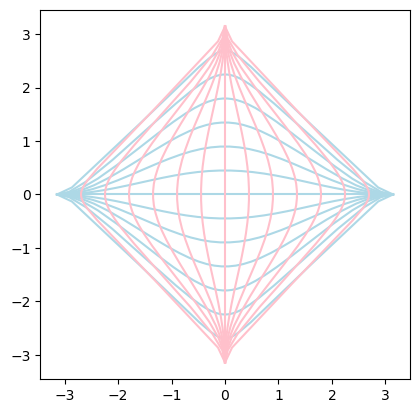

In [38]:
# Plot the world lines for (x,t) in Penrose coordinates, and save them, if required. (Be sure to create/edit folder names as 
# appropriate, to save your files!)

for i in range(len(t1)):
    X1,T1 = penrose_coords(x1, t1[i])
    plt.plot(X1, T1, c = "lightblue", alpha = 1)
#     np.savetxt('Data/Minkowski_t/t'+str(i)+'.csv',np.stack((X1,T1)).T, delimiter=',', 
#                fmt='%f', header="X,T", comments="")
    

for i in range(len(x2)):
    X2,T2 = penrose_coords(x2[i], t2)
    plt.plot(X2, T2, c = "pink", alpha = 1)
#     np.savetxt('Data/Minkowski_x/x'+str(i)+'.csv',np.stack((X2,T2)).T, delimiter=',', 
#                fmt='%f', header="X,T", comments="")

plt.gca().set_aspect(1.0)
plt.show()

### Timelike geodesic for a particle ###

In [12]:
# For a particle traveling at v=0.5c, generate its path along the Penrose diagram.

t = np.tan(np.linspace(-np.pi/2,np.pi/2,100))
x = 0.5*t

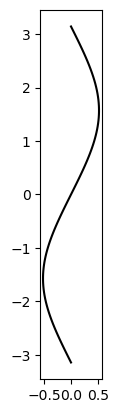

In [13]:
# The path generated here is also used in Figure 4 on the report.

X1,T1 = penrose_coords(x,t)
plt.plot(X1, T1, c = "black", alpha = 1)
# np.savetxt('Data/Minkowski_particle_0.5.csv',np.stack((X1,T1)).T, delimiter=',', 
#                fmt='%f', header="X,T", comments="")

plt.gca().set_aspect(1.0)
plt.show()

In [9]:
X1[30], T1[30] # point used for the light cone in figure 4

(-0.47628319707351374, -1.1603890848090834)

### (p,w) coordinates ###

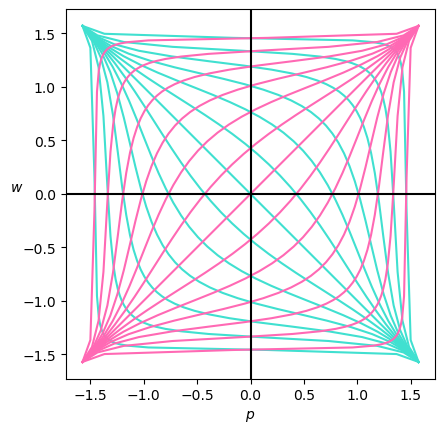

In [22]:
# Generating Figure 2 on the report; plots the transformation to (p,w) coordinates.

for i in range(len(t1)):
    p1,w1 = pw_coords(x1, t1[i])
    plt.plot(p1, w1, c = "turquoise", alpha = 1)
    

for i in range(len(x2)):
    p2,w2 = pw_coords(x2[i], t2)
    plt.plot(p2, w2, c = "hotpink", alpha = 1)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel("$p$")
plt.ylabel("$w$", rotation = 0)
plt.gca().set_aspect(1.0)
plt.show()

# Schwarzschild Metric #

### Penrose diagram world lines ###

In [81]:
M = 1 # Mass of the black hole in natural units

# for the world lines of constant time t
t1 = np.linspace(-20*M,20*M,20)
r1 = np.linspace(0.01*M,2*M,100)
r2 = np.linspace(2*M,20*M,100)

# for the world lines of constant spatial coordinate r
t2 = np.linspace(-20*M,20*M,100)
# Manually add r-values that appear spaced apart to make things easier, since r values are significantly warped.
r3 = [0.01*M, 1.45*M, 1.7*M, 1.85*M, 1.95*M, 1.99*M, 1.999*M] 
r4 = [2.001*M , 2.01*M, 2.05*M, 2.15*M, 2.3*M, 2.55*M, 2.94*M, 3.55*M, 4.7*M, 7*M, 10*M]

In [82]:
# Define the Penrose coordinate transformation from (U,V) (Kruskal) coordinates.

def penrose_coords(u,v):
    R = (np.arctan(v+u)-np.arctan(v-u))
    T = (np.arctan(v+u)+np.arctan(v-u))
    
    return R,T

# Define the transformation from (r,t) coordinates to Kruskal (U,V) coordinates, both inside and outside the black hole.

def uv_coords_outside(r,t,M):
    u = np.sqrt((r/(2.0*M)) - 1) * np.exp(r/(4.0*M)) * np.cosh(t/(4.0*M))
    v = np.sqrt((r/(2.0*M)) - 1) * np.exp(r/(4.0*M)) * np.sinh(t/(4.0*M))
    
    return u,v

def uv_coords_inside(r,t,M):
    u = np.sqrt(1 - (r/(2.0*M))) * np.exp(r/(4.0*M)) * np.sinh(t/(4.0*M))
    v = np.sqrt(1 - (r/(2.0*M))) * np.exp(r/(4.0*M)) * np.cosh(t/(4.0*M))
    
    return u,v

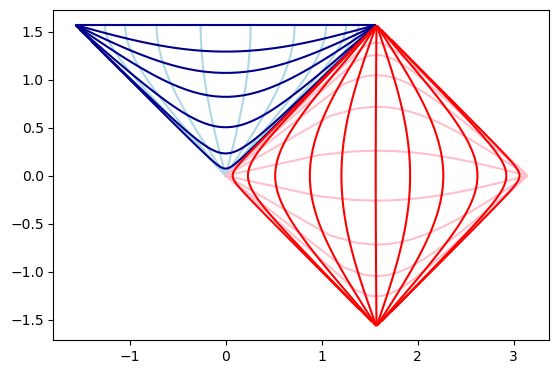

In [83]:
# Plot all of the world lines, and save them.

for i in range(len(t1)):
    # There are too many world lines --- get rid of ones at the boundaries that are clustering up
    if (i > 14) | (i < 6):
        continue
    u1,v1 = uv_coords_inside(r1, t1[i], M)
    R1,T1 = penrose_coords(u1,v1)
    plt.plot(R1, T1, c = "lightblue", alpha = 1)
    np.savetxt('Data/Schwarz_T/ins_'+str(i)+'.csv',np.stack((R1,T1)).T, delimiter=',', 
               fmt='%f', header="R,T", comments="")
    
    u2,v2 = uv_coords_outside(r2, t1[i], M)
    R2,T2 = penrose_coords(u2,v2)
    plt.plot(R2, T2, c = "pink", alpha = 1)
    np.savetxt('Data/Schwarz_T/out_'+str(i)+'.csv',np.stack((R2,T2)).T, delimiter=',', 
               fmt='%f', header="R,T", comments="")
    
    
for i in range(len(r3)):
    u1,v1 = uv_coords_inside(r3[i], t2, M)
    R1,T1 = penrose_coords(u1,v1)
    plt.plot(R1, T1, c = "darkblue", alpha = 1)
    np.savetxt('Data/Schwarz_R/ins_'+str(i)+'.csv',np.stack((R1,T1)).T, delimiter=',', 
               fmt='%f', header="R,T", comments="")
    
for i in range(len(r4)):
    u2,v2 = uv_coords_outside(r4[i], t2, M)
    R2,T2 = penrose_coords(u2,v2)
    plt.plot(R2, T2, c = "red", alpha = 1)
    np.savetxt('Data/Schwarz_R/out_'+str(i)+'.csv',np.stack((R2,T2)).T, delimiter=',', 
               fmt='%f', header="R,T", comments="")

plt.gca().set_aspect(1.0)
plt.show()